[View in Colaboratory](https://colab.research.google.com/github/gops75/dLclass/blob/master/inkersDL_p1_1stDNN.ipynb)

In [1]:
!pip install keras

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


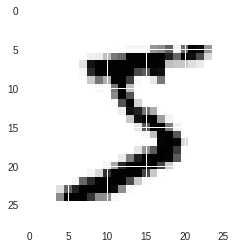

In [4]:
print(X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [5]:
X_train.shape[0]

60000

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28, 28, 1)))
# This gives an output of 26 x 26 x 32, which feeds into the next layer as input
model.add(Convolution2D(20, 3, 3, activation='relu'))
# This yields 24 x 24 x 20
model.add(Convolution2D(10, 1, activation='relu'))
# This gives an output of 24 x 24 x 10
model.add(Convolution2D(10, 24))
# The final output from the above convolution is 1 x 1 x 10
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 20)        5780      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        210       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 10)          57610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 63,920
Trainable params: 63,920
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 22s 370us/step - loss: 0.1522 - acc: 0.9561
Epoch 2/10
50720/60000 [========================>.....] - ETA: 3s - loss: 0.0570 - acc: 0.9830

60000/60000 [==============================] - 21s 351us/step - loss: 0.0563 - acc: 0.9831
Epoch 3/10
60000/60000 [==============================] - 21s 350us/step - loss: 0.0385 - acc: 0.9879
Epoch 4/10
12736/60000 [=====>........................] - ETA: 16s - loss: 0.0259 - acc: 0.9925

60000/60000 [==============================] - 21s 350us/step - loss: 0.0290 - acc: 0.9908
Epoch 5/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.0212 - acc: 0.9929
Epoch 6/10
 1472/60000 [..............................] - ETA: 20s - loss: 0.0190 - acc: 0.9932

60000/60000 [==============================] - 21s 350us/step - loss: 0.0180 - acc: 0.9940
Epoch 7/10
58208/60000 [============================>.] - ETA: 0s - loss: 0.0127 - acc: 0.9957

60000/60000 [==============================] - 21s 349us/step - loss: 0.0128 - acc: 0.9957
Epoch 8/10
60000/60000 [==============================] - 21s 350us/step - loss: 0.0127 - acc: 0.9956
Epoch 9/10
14720/60000 [======>.......................] - ETA: 15s - loss: 0.0066 - acc: 0.9980

60000/60000 [==============================] - 21s 351us/step - loss: 0.0090 - acc: 0.9971
Epoch 10/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.0073 - acc: 0.9976


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print(score)

[0.07312042639493739, 0.983]


In [0]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[2.32128076e-19 4.40732707e-23 9.41981546e-14 8.00100403e-11
  9.97100364e-25 2.99294548e-19 4.14574817e-33 1.00000000e+00
  1.44003516e-12 3.91168760e-13]
 [3.59795085e-16 2.77227717e-14 1.00000000e+00 2.07766078e-16
  3.36003346e-25 7.91899808e-20 2.70576123e-13 3.21128432e-24
  1.22685311e-15 1.82456672e-20]
 [1.57578200e-10 9.99999046e-01 9.54367030e-10 1.43388204e-10
  1.91250507e-07 1.39621594e-08 1.48263510e-07 1.40698608e-09
  5.75471347e-07 1.23190286e-11]
 [1.00000000e+00 1.23913958e-21 8.55222737e-09 2.05251347e-14
  1.63648751e-18 9.35078973e-14 2.74771855e-11 3.28569942e-14
  2.20874859e-13 4.84762241e-13]
 [1.92134902e-11 7.38564591e-13 7.27124507e-15 5.92119409e-12
  9.99991298e-01 8.49195197e-19 6.86734444e-19 2.03382538e-14
  1.09402584e-10 8.69111045e-06]
 [5.99786262e-11 9.99981165e-01 2.97012304e-09 1.38569975e-10
  9.56234089e-06 1.94613770e-10 1.28070310e-09 3.76896492e-06
  5.46496494e-06 2.34454595e-10]
 [4.71783250e-23 4.92867635e-14 1.71523906e-12 1.93833071e

In [19]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7f3b6dd3ecf8>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7f3b6ddb09e8>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7f3b6dddea58>, 'conv2d_4': <keras.layers.convolutional.Conv2D object at 0x7f3b6dd5e390>, 'flatten_1': <keras.layers.core.Flatten object at 0x7f3b62956668>, 'activation_1': <keras.layers.core.Activation object at 0x7f3b6296a198>}


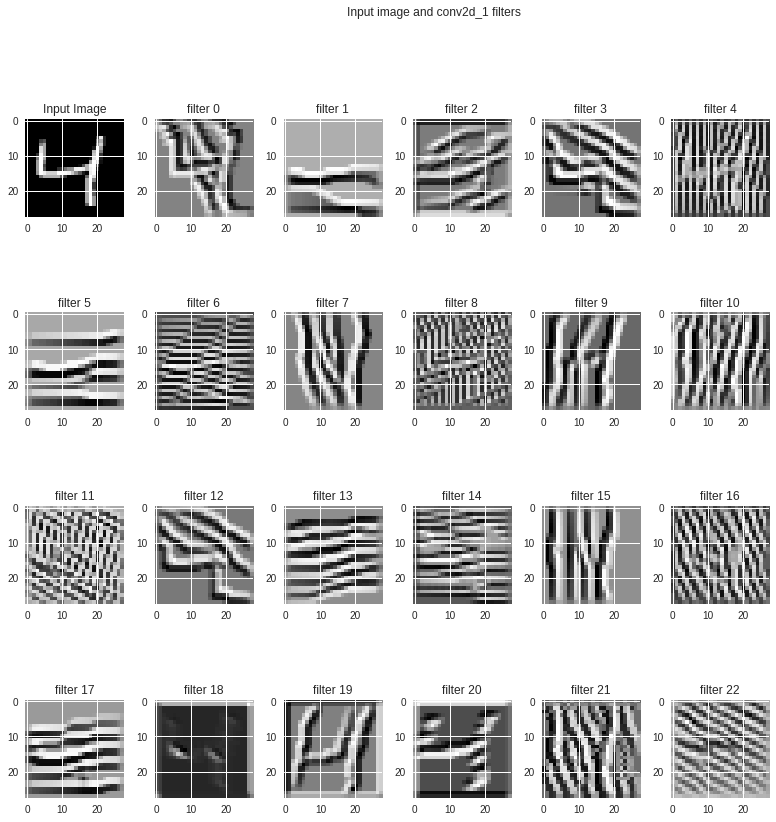

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
  # normalize tensor: center on 0., sensure std is 0.1
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1
  
  # clip to [0, 1]
  x += 0.5
  x = np.clip(x, 0, 1)
  
  # convert to RGB array
  x *= 255
  #x = x.transpose((1, 2, 0))
  x = np.clip(x, 0, 255).astype('uint8')
  return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), layer_name = 'conv2d_1'):
  layer_output = layer_dict[layer_name].output
  img_ascs = list()
  for filter_index in range(layer_output.shape[3]):
    # build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]
    
    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    # this function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # step size for gradient ascent
    step = 5.
    
    img_asc = np.array(img)
    # run gradient ascent for 20 steps
    for i in range(20):
      loss_value, grads_value = iterate([img_asc])
      img_asc += grads_value * step
      
    img_asc = img_asc[0]
    img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
    
  if layer_output.shape[3] >= 35:
    plot_x, plot_y = 6, 6
  elif layer_output.shape[3] >= 23:
    plot_x, plot_y = 4, 6
  elif layer_output.shape[3] >= 11:
    plot_x, plot_y = 2, 6
  else:
    plot_x, plot_y = 1, 2
  
  fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
  ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
  ax[0, 0].set_title('Input Image')
  fig.suptitle('Input image and %s filters' % (layer_name, ))
  fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
  for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
    if x == 0 and y == 0:
      continue
    ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
    ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))
    
vis_img_in_filter()

    
 